 # Notes
 - The idea of this notebook is identical to the original stardist notebook "stardist/examples/2D/1_data.ipynb" (Some things are ommited, since our data is simpler than theirs)
 - In this notebook they are looking at the labels and study if they can be approximated well with 8,16,32 ray casting technique.
 - I simply plug in my data in the last cells and do exactly what they did with their test nuclei labels.

In [1]:
import sys,os

ROOT_DIR = os.path.abspath( '..' )
sys.path.append(ROOT_DIR)

DATA_DIR = os.path.join( ROOT_DIR, 'data' )
# DATA_RAW_DIR = os.path.join( DATA_DIR, '1_official_test_set' )
# DATA_GEN_DIR = os.path.join(DATA_DIR, '2_generated_from_official_set' )
DATA_RAW_DIR = os.path.join( DATA_DIR, '1_icy-benchmark-training_set' )
DATA_GEN_DIR = os.path.join(DATA_DIR, '2_generated_from_icy_benchmark_set' )
IMAGES_DIR = os.path.join(DATA_GEN_DIR, 'images' )
MASKS_DIR = os.path.join(DATA_GEN_DIR, 'masks' )

In [2]:
from __future__ import print_function, unicode_literals, absolute_import, division
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = None
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
from tqdm import tqdm
from tifffile import imread
from csbdeep.utils import Path, download_and_extract_zip_file

from stardist import fill_label_holes, relabel_image_stardist, random_label_cmap
from stardist.matching import matching_dataset

np.random.seed(42)
lbl_cmap = random_label_cmap()

# Load data

In [3]:
# all images:
files = os.listdir(IMAGES_DIR)
tifs = [f for f in files if 'tif' in f]
tifs.sort()

# the naming should be identical; the abs paths to the images (X) and the masks (Y):
imgs = [os.path.join(IMAGES_DIR, t) for t in tifs]
masks = [os.path.join(MASKS_DIR, t) for t in tifs]
print('Found %d images'%len(imgs))

Found 4800 images


In [4]:
# let's load only a portion of the files.
# there are 100 frames per movie; this would make 1 image per movie. 
inds = np.arange(0, len(tifs), 100).astype(int)
X = [imgs[i] for i in inds]
Y = [masks[i] for i in inds]
print('Loading each 100th  files for testing; total: %d'%len(X) )

# loading:
X = list(map(imread, X))
Y = list(map(imread, Y))
# X,Y are now lists of numpy arrays!

i = 10
img, lbl = X[i], fill_label_holes(Y[i])

Loading each 100th  files for testing; total: 48


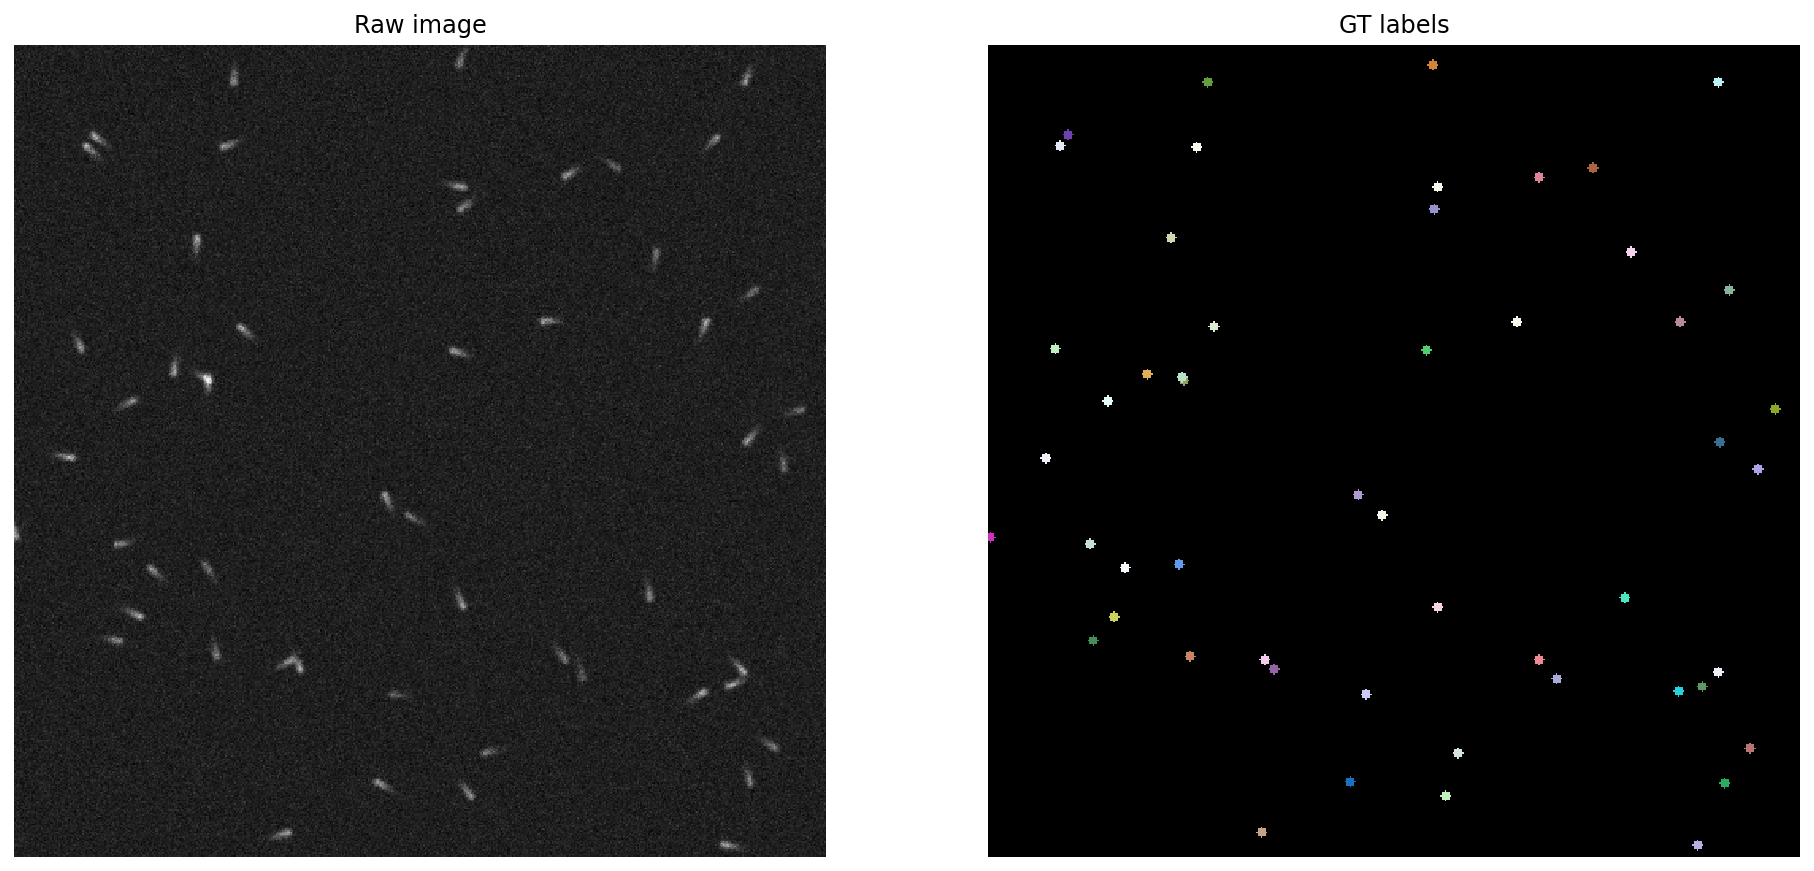

In [5]:
plt.figure(figsize=(16,10))
plt.subplot(121); plt.imshow(img,cmap='gray');   plt.axis('off'); plt.title('Raw image')
plt.subplot(122); plt.imshow(lbl,cmap=lbl_cmap); plt.axis('off'); plt.title('GT labels')
None;

# Test effect of number of rays on GT recinstruction

In [6]:
n_rays = [2**i for i in range(2,8)]
scores = []
for r in tqdm(n_rays):
    Y_reconstructed = [relabel_image_stardist(lbl, n_rays=r) for lbl in Y]
    mean_iou = matching_dataset(Y, Y_reconstructed, thresh=0, show_progress=False).mean_true_score
    scores.append(mean_iou)

100%|██████████| 6/6 [01:24<00:00, 14.14s/it]


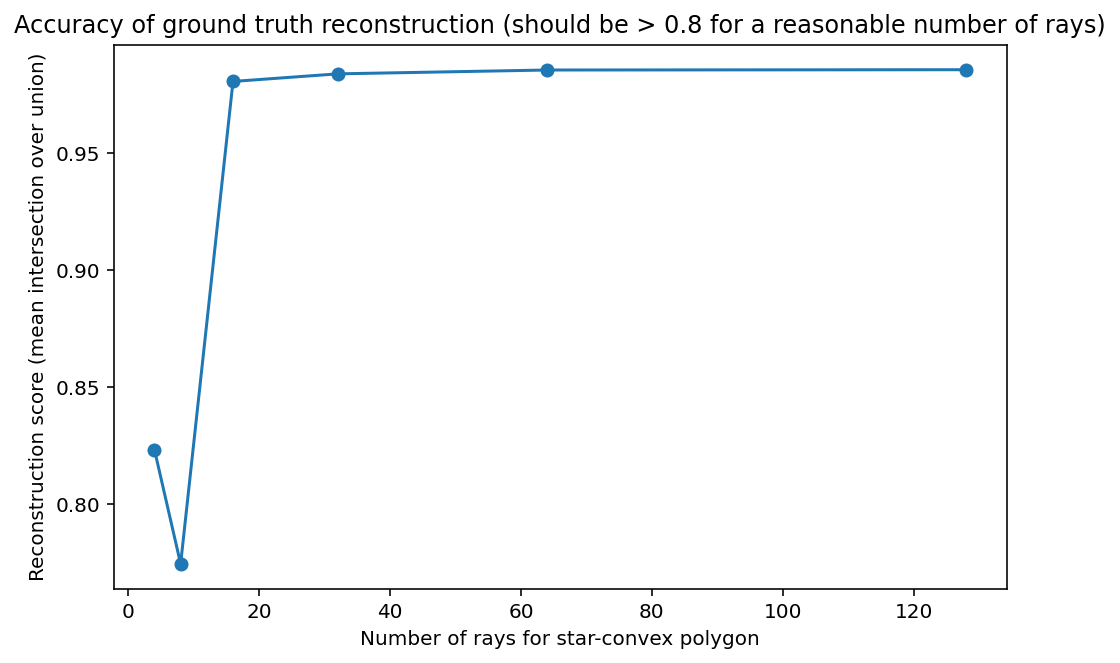

In [7]:
plt.figure(figsize=(8,5))
plt.plot(n_rays, scores, 'o-')
plt.xlabel('Number of rays for star-convex polygon')
plt.ylabel('Reconstruction score (mean intersection over union)')
plt.title("Accuracy of ground truth reconstruction (should be > 0.8 for a reasonable number of rays)")
None;

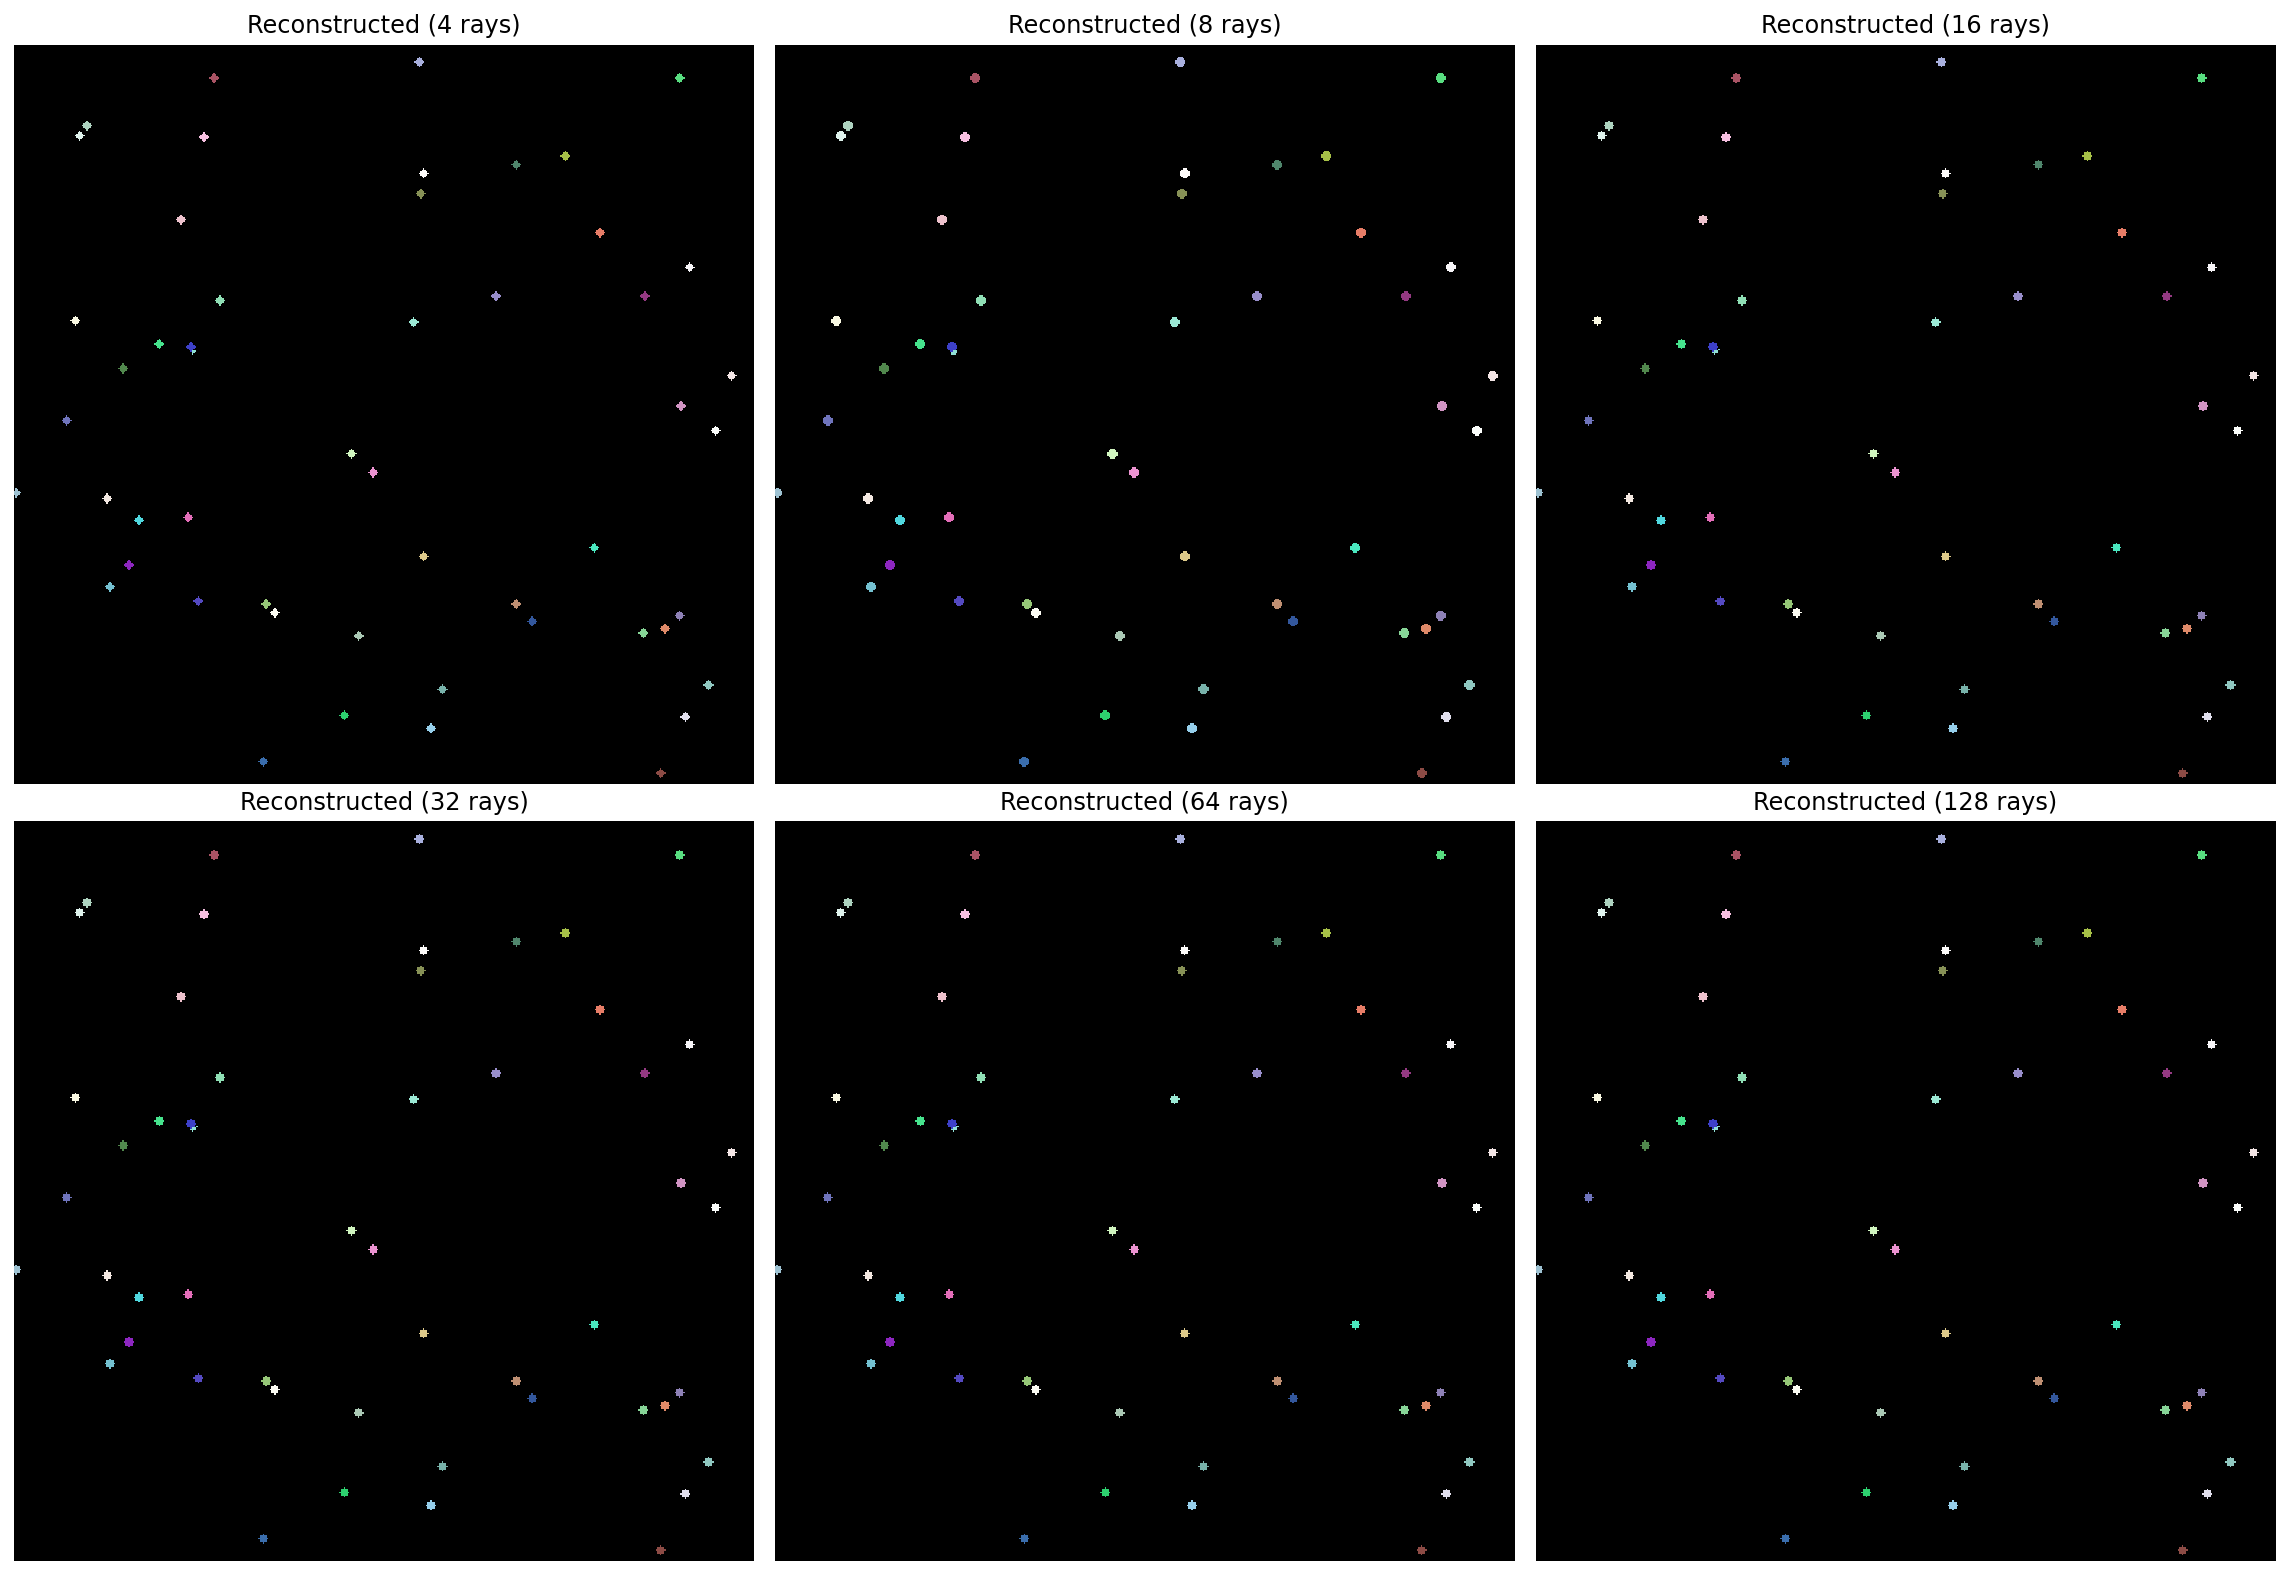

In [8]:
%matplotlib inline
#notebook
fig, ax = plt.subplots(2,3, figsize=(16,11))
for a,r in zip(ax.flat,n_rays):
    a.imshow(relabel_image_stardist(lbl, n_rays=r), cmap=lbl_cmap)
    a.set_title('Reconstructed (%d rays)' % r)
    a.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


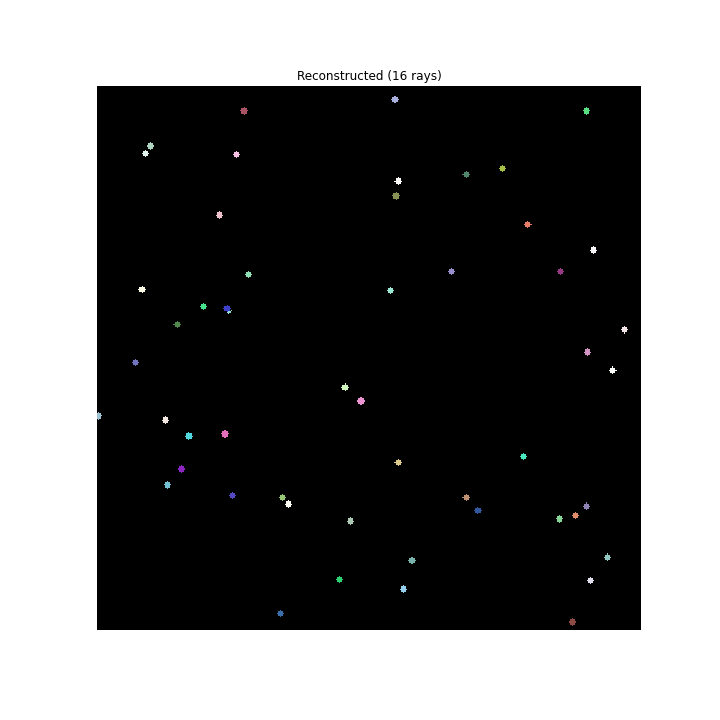

(-0.5, 511.5, 511.5, -0.5)

In [11]:
%matplotlib notebook
# inlinie

# number of rays:
r = 16
fig, ax = plt.subplots(1, figsize=(10,10))
ax.imshow(relabel_image_stardist(lbl, n_rays=r), cmap=lbl_cmap)
ax.set_title('Reconstructed (%d rays)' % r)
ax.axis('off')